C:\Users\user\AppData\Local\Temp\ipykernel_13624\2400299819.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=colors)


NameError: name 'df_clean' is not defined

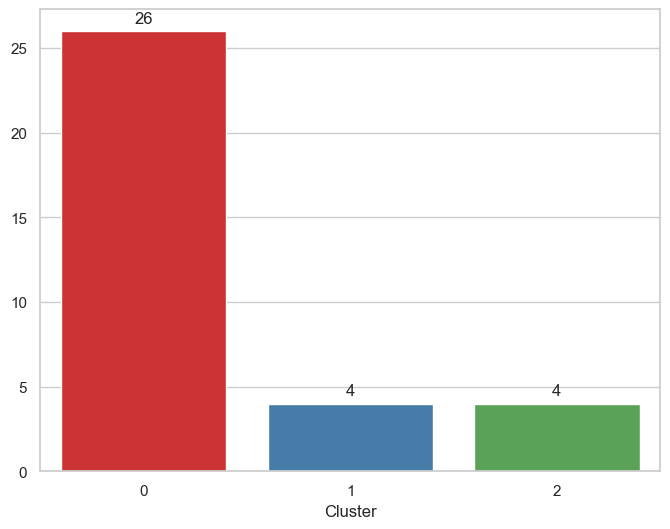

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dan bersihkan data
df = pd.read_csv("Klasifikasi_Tingkat_Kemiskinan_Diperbaiki.csv")
columns_to_clean = [
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
    'Indeks Pembangunan Manusia',
    'Umur Harapan Hidup (Tahun)',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
    'Tingkat Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja'
]

# Mengganti koma menjadi titik
for col in columns_to_clean:
    df[col] = df[col].apply(lambda x: float(str(x).replace(",", ".")))

# Mengelompokkan berdasarkan provinsi
df_provinsi = df.groupby("Provinsi").mean(numeric_only=True)

# Standarisasi dan clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_provinsi)
kmeans = KMeans(n_clusters=3, random_state=42)
df_provinsi['Cluster'] = kmeans.fit_predict(scaled_data)

# Menambahkan kembali nama provinsi
df_provinsi_reset = df_provinsi.reset_index()

# ===== Tambahan: Rata-rata indikator per cluster =====
numeric_cols = df_provinsi_reset.select_dtypes(include='number').columns.tolist()
cluster_summary = df_provinsi_reset.groupby("Cluster")[numeric_cols].mean()


# ===== Visualisasi diagram batang =====
sns.set(style="whitegrid")
cluster_counts = df_provinsi['Cluster'].value_counts().sort_index()
colors = sns.color_palette("Set1", 3)

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=colors)
for i, value in enumerate(cluster_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12)


# Nomor 1: Menentukan nama untuk tiap cluster berdasarkan rata-rata nilai fitur di setiap cluster


# Tampilkan summary untuk analisis manual
cluster_summary


plt.title('Distribusi Provinsi per Cluster\n(Hasil Segmentasi K-Means)', fontsize=14, weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Provinsi')
plt.xticks([0, 1, 2], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.tight_layout()
plt.savefig("diagram_batang_cluster.png", dpi=300)
plt.show()
